# Estimating Gestational Diabetes Onset
### Reverse Timeseries Forecasting

## EDA

<ul>
	<li><a href="#Imports"><strong>Imports</strong></a></li>
	<li><a href="#Notebook-Settings"><strong>Notebook Settings</a></li>
	<li><a href="#Load-the-data"><strong>Loading the data</strong></a>
		<ul>
			<li>Setting the index</li>
		</ul>
	</li>
    <li><a href="#Full-dataframe"><strong>Full dataframe</strong></a>
		<ul>
			<li>All Blood Glucose Readings</li>
			<li>All Carb Records</li>
		</ul>
	</li>
	<li><a href="#Daily-dataframe"><strong>Daily dataframe</strong></a>
		<ul>
			<li>bg_fasting</li>
			<li>bg_avg</li>
			<li>carbs_sum</li>
			<li>meds_dose</li>
		</ul>
	</li>
</ul>


### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import pytz

import seaborn as sns

### Notebook Settings

In [2]:
pd.set_option('display.max_rows', 500)

### Load the data

In [3]:
df = pd.read_csv('data/data_cleaned.csv')
daily = pd.read_csv('data/daily_cleaned.csv')

In [4]:
df.datetime = pd.to_datetime(df.datetime)
daily.date = pd.to_datetime(daily.date)

df.set_index('datetime')
daily.set_index('date')

,daycount,bg_fasting,bg_avg,carbs_sum,meds_dose
date,,,,,
2021-03-11,1,104.0,109,138,0
2021-03-12,2,101.0,110,157,0
2021-03-13,3,96.0,120,154,0
2021-03-14,4,93.0,106,87,0
2021-03-15,5,89.0,108,135,0
2021-03-16,6,92.0,108,110,0
2021-03-17,7,100.0,98,151,0
2021-03-18,8,98.0,114,136,0
2021-03-19,9,100.0,128,136,0


In [5]:
df.dtypes

datetime      datetime64[ns]
type                  object
value                  int64
unit                  object
month                  int64
date                  object
daycount               int64
subtype               object
outOfRange              bool
dtype: object

### Full dataframe

**Time series chart of Blood Glucose readings**

In [6]:
all_bg = df[df.type == 'Blood Sugar Reading'][['datetime', 'value', 'date']]
all_bg.set_index('datetime', inplace=True)

In [7]:
all_bg.dtypes

value     int64
date     object
dtype: object

In [8]:
all_bg.date = pd.to_datetime(all_bg.date)
all_bg.dtypes

value             int64
date     datetime64[ns]
dtype: object

In [9]:
all_bg.head()

,value,date
datetime,,
2021-03-11 07:11:00,104,2021-03-11
2021-03-11 09:20:00,121,2021-03-11
2021-03-11 14:35:00,119,2021-03-11
2021-03-11 19:54:00,87,2021-03-11
2021-03-12 07:04:00,101,2021-03-12


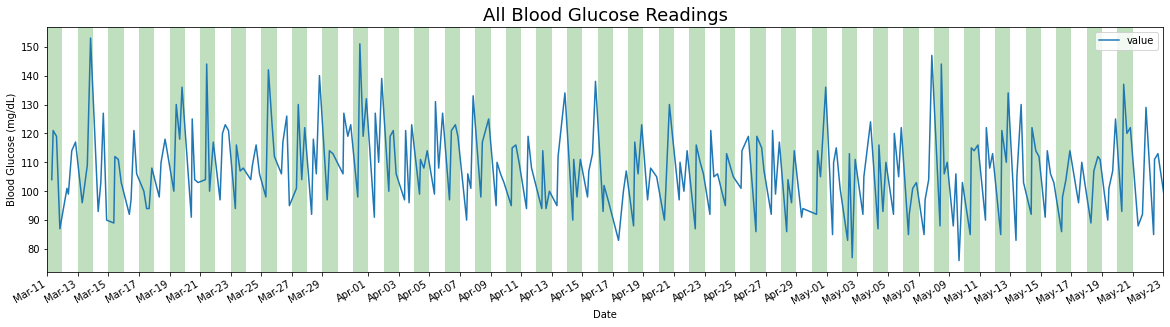

In [10]:
dates_d = pd.date_range(all_bg.iloc[0].name, all_bg.iloc[len(all_bg)-1].name, freq='D', tz='US/Pacific').date

ax = all_bg.plot(y='value', x_compat=True, figsize=(20, 5))

def find_everyother_indices(datetime_array):
    indices = []
    for i in range(len(datetime_array)):
        if i % 2 == 0:
            indices.append(datetime_array[i])
    return indices

def highlight_datetimes(indices, ax):
    i = 0
    while i < len(indices)-1:
        xmin = all_bg[all_bg['date'] == pd.to_datetime(indices[i])].iloc[0]
        xmin_index = xmin.date
        xmax = all_bg[all_bg['date'] == pd.to_datetime(indices[i+1])].iloc[0]
        xmax_index = xmax.date - pd.Timedelta(days=1)
        
        ax.axvspan(xmin_index, xmax_index, facecolor='green', edgecolor='none', alpha=.25)
        i += 1

#find to-be highlighted areas, see functions
everyother_indices = find_everyother_indices(all_bg.date.unique())
#highlight areas
highlight_datetimes(everyother_indices, ax)

#formatting..
ax.xaxis.grid(visible=True, which='minor', color='black', linestyle='--', alpha=.5) #add xaxis gridlines
ax.set_xlim(min(dates_d), max(dates_d))
ax.set_title('All Blood Glucose Readings', fontsize=18)
plt.xlabel('Date')
plt.ylabel('Blood Glucose (mg/dL)')

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=np.arange(1, 31, step=2)))
# ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=np.arange(1, 31, step=2)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
# ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b-%d'))

plt.savefig('vis/all_bg.png', bbox_inches="tight")
plt.show()

**Time series chart of Carb readings**

In [11]:
all_carbs = df[df.type == 'Carbs'][['datetime', 'value', 'date']]
all_carbs.set_index('datetime', inplace=True)

In [12]:
all_carbs.dtypes

value     int64
date     object
dtype: object

In [13]:
all_carbs.date = pd.to_datetime(all_carbs.date)
all_carbs.head()

,value,date
datetime,,
2021-03-11 08:01:00,26,2021-03-11
2021-03-11 11:18:00,27,2021-03-11
2021-03-11 13:30:00,30,2021-03-11
2021-03-11 17:30:00,13,2021-03-11
2021-03-11 18:55:00,42,2021-03-11


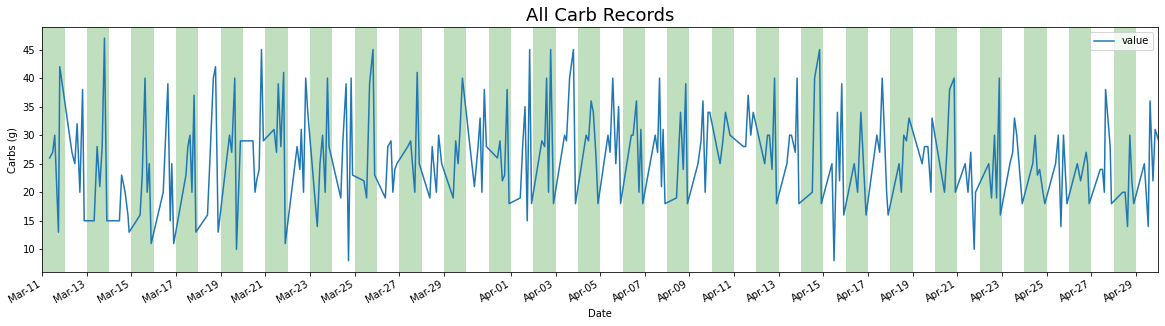

In [14]:
dates_d = pd.date_range(all_carbs.iloc[0].name, all_carbs.iloc[len(all_bg)-1].name, freq='D', tz='US/Pacific').date

ax = all_carbs.plot(y='value', x_compat=True, figsize=(20, 5))

def find_everyother_indices(datetime_array):
    indices = []
    for i in range(len(datetime_array)):
        if i % 2 == 0:
            indices.append(datetime_array[i])
    return indices

def highlight_datetimes(indices, ax):
    i = 0
    while i < len(indices)-1:
        xmin = all_bg[all_bg['date'] == pd.to_datetime(indices[i])].iloc[0]
        xmin_index = xmin.date
        xmax = all_bg[all_bg['date'] == pd.to_datetime(indices[i+1])].iloc[0]
        xmax_index = xmax.date - pd.Timedelta(days=1)
        
        ax.axvspan(xmin_index, xmax_index, facecolor='green', edgecolor='none', alpha=.25)
        i += 1

#find to-be highlighted areas, see functions
everyother_indices = find_everyother_indices(all_carbs.date.unique())
#highlight areas
highlight_datetimes(everyother_indices, ax)

#formatting..
ax.xaxis.grid(visible=True, which='minor', color='black', linestyle='--', alpha=.5) #add xaxis gridlines
ax.set_xlim(min(dates_d), max(dates_d))
ax.set_title('All Carb Records', fontsize=18)
plt.xlabel('Date')
plt.ylabel('Carbs (g)')

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=np.arange(1, 31, step=2)))
# ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=np.arange(1, 31, step=2)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
# ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b-%d'))

plt.savefig('vis/all_carbs.png', bbox_inches="tight")
plt.show()

**Scatter!**

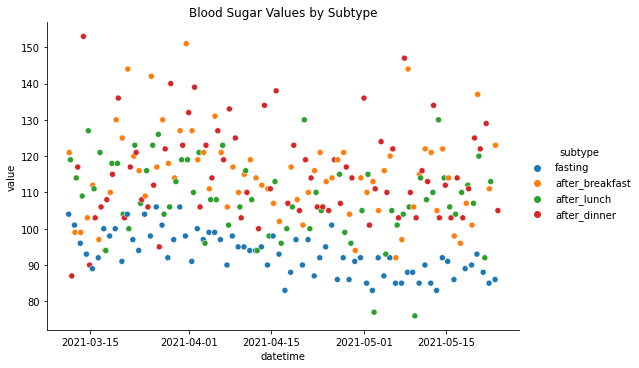

In [15]:
sns.relplot(x='datetime', y='value', data=df[df.type == 'Blood Sugar Reading'], hue='subtype', height=5, aspect=1.5).set(title='Blood Sugar Values by Subtype')

plt.savefig('vis/all_bg_by_subtype.png', bbox_inches="tight")
plt.show()

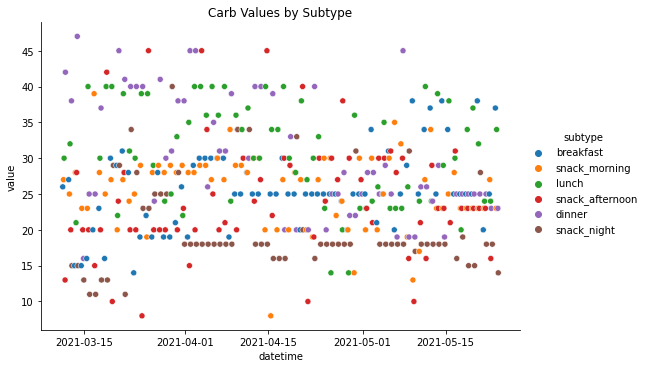

In [16]:
sns.relplot(x='datetime', y='value', data=df[df.type == 'Carbs'], hue='subtype', height=5, aspect=1.5).set(title='Carb Values by Subtype')

plt.savefig('vis/all_carbs_by_subtype.png', bbox_inches="tight")
plt.show()

### Daily dataframe

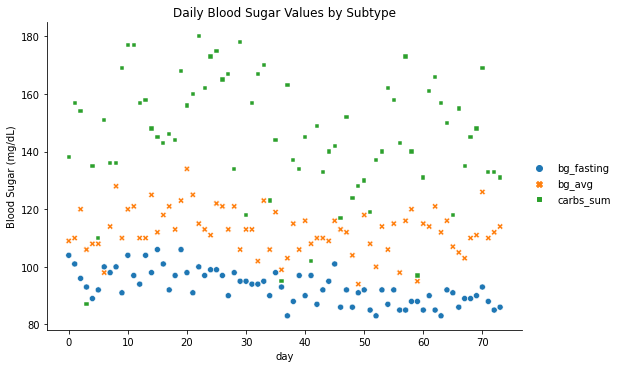

In [17]:
sns.relplot(data=daily[['bg_fasting', 'bg_avg', 'carbs_sum']], height=5, aspect=1.5).set(title='Daily Blood Sugar Values by Subtype', xlabel='day', ylabel='Blood Sugar (mg/dL)')

plt.savefig('vis/daily_bg_by_subtype.png', bbox_inches="tight")
plt.show()

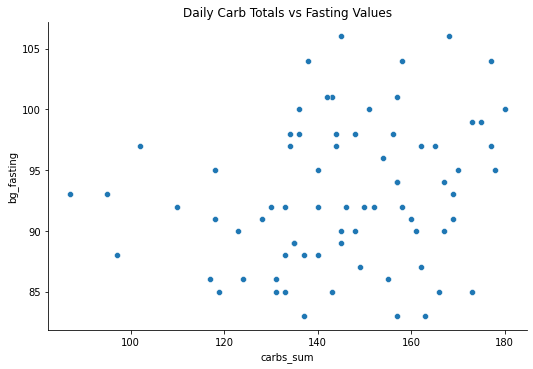

In [18]:
sns.relplot(x='carbs_sum', y='bg_fasting', data=daily, height=5, aspect=1.5).set(title='Daily Carb Totals vs Fasting Values')

plt.savefig('vis/daily_corr_carbs_fasting.png', bbox_inches="tight")
plt.show()

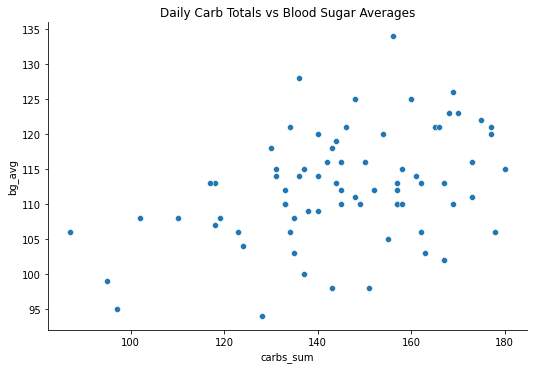

In [19]:
sns.relplot(x='carbs_sum', y='bg_avg', data=daily, height=5, aspect=1.5).set(title='Daily Carb Totals vs Blood Sugar Averages')

plt.savefig('vis/daily_corr_carbs_bgavg.png', bbox_inches="tight")
plt.show()

In [20]:
daily.corr()

,daycount,bg_fasting,bg_avg,carbs_sum,meds_dose
daycount,1.000000,-0.679171,-0.194073,-0.142379,0.952000
bg_fasting,-0.679171,1.000000,0.333013,0.225437,-0.707122
bg_avg,-0.194073,0.333013,1.000000,0.406634,-0.323538
carbs_sum,-0.142379,0.225437,0.406634,1.000000,-0.226227
meds_dose,0.952000,-0.707122,-0.323538,-0.226227,1.000000


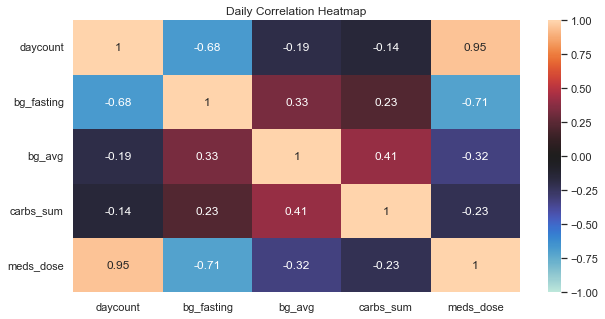

In [21]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.heatmap(daily.corr(), vmin=-1, vmax=1, annot=True, center=0).set(title='Daily Correlation Heatmap')

plt.savefig('vis/daily_corr_heatmap.png', bbox_inches="tight")
plt.show()

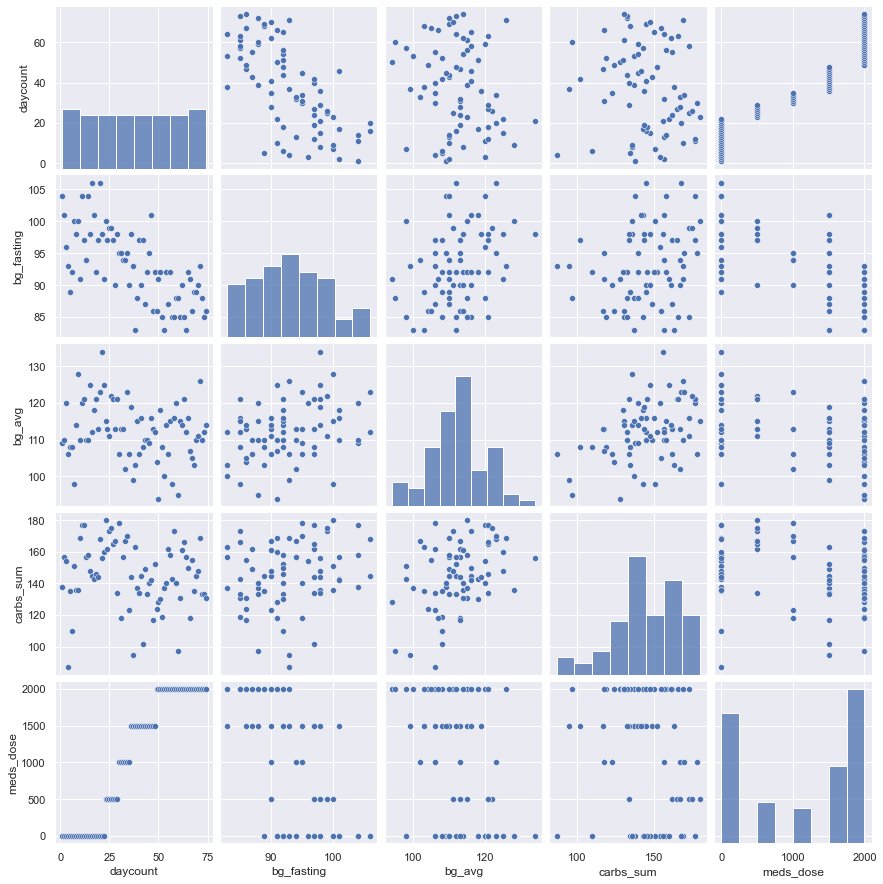

In [27]:
sns.pairplot(daily)

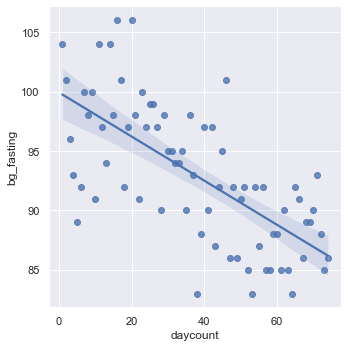

In [23]:
sns.lmplot(x='daycount', y='bg_fasting', data=daily)